In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv('C:\\Users\\Nehal\\Downloads\\Titanic-Dataset.csv')


In [9]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = data[features]
y = data[target]



In [10]:
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].mean())
X.loc[:, 'Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])



In [15]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)



In [17]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_test)


In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 81.01%


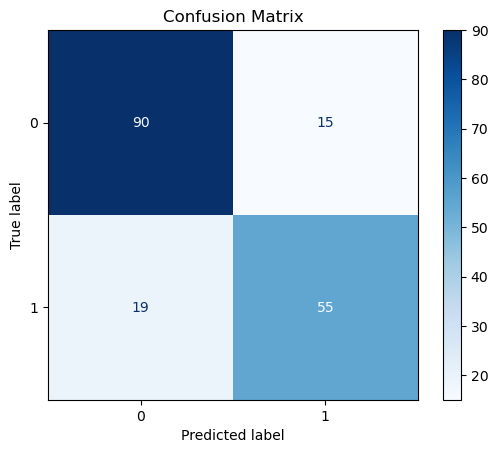

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()